In [6]:
# беру данные с сайта Музторга, раздел электрогитары

In [7]:
!pip install requests

In [8]:
import requests

In [9]:
# копирую и вставляю URL первой страницы раздела на сайте

In [10]:
url = 'https://www.muztorg.ru/category/elektrogitary?in-stock=1&pre-order=1&page=1'

In [11]:
response = requests.get(url)
response

<Response [200]>

In [12]:
response.content

b'\n<!DOCTYPE html>\n<html lang="ru-RU">\n<head>\n    <meta name="description" content="\xd0\xad\xd0\xbb\xd0\xb5\xd0\xba\xd1\x82\xd1\x80\xd0\xbe\xd0\xb3\xd0\xb8\xd1\x82\xd0\xb0\xd1\x80\xd1\x8b \xd0\xb2 \xd0\xbd\xd0\xb0\xd1\x88\xd0\xb5\xd0\xbc \xd0\xbc\xd0\xb0\xd0\xb3\xd0\xb0\xd0\xb7\xd0\xb8\xd0\xbd\xd0\xb5 \xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd1\x81\xd1\x82\xd0\xb0\xd0\xb2\xd0\xbb\xd0\xb5\xd0\xbd\xd1\x8b 6-, 7- \xd0\xb8 8-\xd1\x81\xd1\x82\xd1\x80\xd1\x83\xd0\xbd\xd0\xbd\xd1\x8b\xd0\xbc\xd0\xb8 \xd0\xbc\xd0\xbe\xd0\xb4\xd0\xb5\xd0\xbb\xd1\x8f\xd0\xbc\xd0\xb8, \xd1\x81 \xd0\xba\xd0\xbe\xd0\xbb\xd0\xb8\xd1\x87\xd0\xb5\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe\xd0\xbc \xd0\xbb\xd0\xb0\xd0\xb4\xd0\xbe\xd0\xb2 \xd0\xbe\xd1\x82 20 \xd0\xb4\xd0\xbe 24. \xd0\x9e\xd0\xb3\xd1\x80\xd0\xbe\xd0\xbc\xd0\xbd\xd1\x8b\xd0\xb9 \xd0\xb2\xd1\x8b\xd0\xb1\xd0\xbe\xd1\x80 \xd0\xbc\xd0\xbe\xd0\xb4\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xb9 \xd0\xba\xd0\xbe\xd1\x80\xd0\xbf\xd1\x83\xd1\x81\xd0\xbe\xd0\xb2 Stratocaster&#039; \xd0\xbe\xd

In [13]:
from bs4 import BeautifulSoup

In [14]:
# парсинг первой страницы сайта

In [15]:
tree = BeautifulSoup(response.content, 'html.parser')

In [16]:
tree


<!DOCTYPE html>

<html lang="ru-RU">
<head>
<meta content="Электрогитары в нашем магазине представлены 6-, 7- и 8-струнными моделями, с количеством ладов от 20 до 24. Огромный выбор моделей корпусов Stratocaster' ов, Telecaster'ов." name="description"/>
<link href="https://www.muztorg.ru/category/elektrogitary" rel="canonical"/>
<link href="/assets/minify/e72fa1ac21459d276d0f79c04c1588f0.css" rel="stylesheet"/>
<style>#price-slider-slider .slider-handle{border-bottom-color:#428bca}#price-slider-slider .slider-selection{background:#f0ad4e}</style>
<script async="async" onerror='var self = this;window.ADMITAD=window.ADMITAD||{},ADMITAD.Helpers=ADMITAD.Helpers||{},ADMITAD.Helpers.generateDomains=function(){for(var e=new Date,n=Math.floor(new Date(2020,e.getMonth(),e.getDate()).setUTCHours(0,0,0,0)/1e3),t=parseInt(1e12*(Math.sin(n)+1)).toString(30),i=["de"],o=[],a=0;a&lt;i.length;++a)o.push({domain:t+"."+i[a],name:t});return o},ADMITAD.Helpers.findTodaysDomain=function(e){function n(){var

In [17]:
# выведем название раздела на сайте

In [18]:
tree.html.head.title.text

'Электрогитары в интернет-магазине Музторга'

In [19]:
# находим данные под заголовком гитар

In [20]:
all_guitars = tree.find_all('div', {'class':'product-caption'})

In [21]:
# находим данные первой гитары 

In [22]:
all_guitars[0] 

<div class="product-caption">
<div class="product-catalog-grid">
<a href="/category/elektrogitary">Электрогитары</a> </div>
<meta content="Электрогитары" itemprop="category"/>
<div class="product-header">
<div class="title">
<a href="/product/A089212">FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK</a>
<meta content="FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK" itemprop="name"/>
</div>
</div>
<div class="product-existence">
<div class="available-now" data-original-title="Товар есть в вашем регионе или на центральном складе" data-placement="auto" data-toggle="tooltip" title="Товар есть в вашем регионе или на центральном складе">
                            В наличии <i class="fa fa-question-circle"></i>
<link href="https://schema.org/InStock" itemprop="availability"/>
</div>
</div>
<div class="product_offer" itemprop="offers" itemscope="" itemtype="https://schema.org/Offer">
<div class="product-price">
<p class="price">
<meta content="RUB" itemprop="priceCurrency"/>
                    

In [23]:
# хочу найти сколько будет стоить гитара в рассрочку (руб./месяц)

In [24]:
all_guitars[0].find('div', {'class':'product-installment-plan'}).span.text.replace('\xa0', ' ').replace(' ','')

'517руб./мес'

In [25]:
# находим артикул гитары

In [26]:
all_guitars[0].find('div', {'class':'product-buy'}).a.get('data-id')

'A089212'

In [27]:
# находим раздел в котором находится гитара

In [28]:
all_guitars[0].meta.get('content')

'Электрогитары'

In [29]:
# находим фирму гитары и название гитары

In [30]:
all_guitars[0].find('div', {'class':'title'}).meta.get('content').split()[0]

'FENDER'

In [31]:
all_guitars[0].find('div', {'class':'title'}).meta.get('content')

'FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK'

In [32]:
# находим валюту цены гитары

In [33]:
all_guitars[0].find('p').meta.get('content')

'RUB'

In [34]:
# находим цену гитары

In [35]:
all_guitars[0].find('div', {'class':'product-price'}).find('meta', {'itemprop':'price'}).get('content')

'12400'

In [36]:
all_guitars[0].find('div', {'class':'product-price'}).p.text.strip().replace('\xa0',' ').replace(' ','')

'12400р.'

In [37]:
all_guitars[0].find('div', {'class':'product-price'}).text.strip().replace('\xa0',' ').replace(' ','')

'12400р.'

In [38]:
# находим наличие гитары

In [39]:
all_guitars[0].find('div', {'class':'available-now'}).text.strip()

'В наличии'

In [40]:
def get_guitars_info(num_page):
    url = f'https://www.muztorg.ru/category/elektrogitary?in-stock=1&pre-order=1&page={num_page}'
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    all_guitars = tree.find_all('div', {'class':'product-caption'})
    
    guitars_info = []
    for guitar in all_guitars:
        try:
            title = guitar.find('div', {'class':'title'}).meta.get('content')
        except:
            title = '-'
        try:
            content = guitar.meta.get('content')
        except:
            content = '-'
        try:
            price = guitar.find('div', {'class':'product-price'}).p.text.strip().replace('\xa0',' ').replace(' ','')
        except:
            price = '-'
        try:
            available = guitar.find('div', {'class':'available-now'}).text.strip()
        except:
            available = 'Нет в наличии'
        try:
            installment = guitar.find('div', {'class':'product-installment-plan'}).span.text.replace('\xa0', ' ').replace(' ','')
        except:
            installment = '0'
        d = {'Артикул': guitar.find('div', {'class':'product-buy'}).a.get('data-id'),
             'Название гитары': title,
             'Категория': content,
             'Цена': price,
             'Наличие': available,
             'В рассрочку': installment}
        guitars_info.append(d)
    return guitars_info 

In [41]:
# создаю список из всех гитар со всех страниц

In [42]:
guitars_data = []
for i in range(1,39):
        guitars_data += get_guitars_info(i)

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame(guitars_data)

In [45]:
df.head()

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
0,A089212,FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK,Электрогитары,12400р.,В наличии,517руб./мес
1,A089213,FENDER SQUIER MM STRATOCASTER HARD TAIL RED,Электрогитары,12400р.,В наличии,517руб./мес
2,A064659,EPIPHONE Les Paul Special VE Ebony Vintage,Электрогитары,22000р.,В наличии,917руб./мес
3,A023290,YAMAHA PACIFICA 012 BL,Электрогитары,19990р.,В наличии,833руб./мес
4,A076975,FENDER SQUIER BULLET STRAT HT HSS BLK,Электрогитары,21500р.,В наличии,896руб./мес


# шаг 2

In [46]:
# посмотрим где есть пропуски в таблице

In [47]:
df.isna().sum()

Артикул            461
Название гитары      0
Категория            0
Цена                 0
Наличие              0
В рассрочку          0
dtype: int64

In [48]:
# в столбцах у меня содержатся: Артикул, Полное название гитары, Категория в которой находится гитара,
# Цена гитары в рублях, Наличие гитары, Стоимость гитары в рассрочку.

# все пропуски я заполнил внутри кода

# пропуск None в столбце Артикул я заменю на A000000

In [49]:
df['Артикул'].fillna("A000000", inplace = True)
df

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
0,A089212,FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK,Электрогитары,12400р.,В наличии,517руб./мес
1,A089213,FENDER SQUIER MM STRATOCASTER HARD TAIL RED,Электрогитары,12400р.,В наличии,517руб./мес
2,A064659,EPIPHONE Les Paul Special VE Ebony Vintage,Электрогитары,22000р.,В наличии,917руб./мес
3,A023290,YAMAHA PACIFICA 012 BL,Электрогитары,19990р.,В наличии,833руб./мес
4,A076975,FENDER SQUIER BULLET STRAT HT HSS BLK,Электрогитары,21500р.,В наличии,896руб./мес
...,...,...,...,...,...,...
907,A000000,GIBSON 1964 Trini Lopez Standard Reissue VOS S...,Электрогитары,499000р.,Нет в наличии,0
908,A000000,GIBSON 1959 ES-355 Reissue Stop Bar VOS Ebony,Электрогитары,544000р.,Нет в наличии,0
909,A000000,GIBSON CS-356 w/ Ebony Fingerboard Gloss Ebony,Электрогитары,449000р.,Нет в наличии,0
910,A000000,GIBSON CS-356 Figured Top w/ Ebony Fingerboard...,Электрогитары,466000р.,Нет в наличии,0


In [50]:
# удалить строчки  "в рассрочку" = 0, вручную (по другому у меня не получилось), там часто гитары которых нет в наличии

In [51]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
169,A116440,Cort G260CS-3TS G Series,Электрогитары,26892р.,В наличии,0
176,A116428,Cort G290-FAT-BBB G Series,Электрогитары,38943р.,В наличии,0
178,A083955,Godin 032327 5th Avenue CW Kingpin II Cognac B...,Электрогитары,97335р.,"В наличии, по предоплате",0
182,A120813,Schecter DAMIEN ELITE-8 CRED L/H,Электрогитары,59760р.,"В наличии, по предоплате",0
185,A108960,FENDER 1951 Nocaster NOS,Электрогитары,355000р.,В наличии,0
...,...,...,...,...,...,...
907,A000000,GIBSON 1964 Trini Lopez Standard Reissue VOS S...,Электрогитары,499000р.,Нет в наличии,0
908,A000000,GIBSON 1959 ES-355 Reissue Stop Bar VOS Ebony,Электрогитары,544000р.,Нет в наличии,0
909,A000000,GIBSON CS-356 w/ Ebony Fingerboard Gloss Ebony,Электрогитары,449000р.,Нет в наличии,0
910,A000000,GIBSON CS-356 Figured Top w/ Ebony Fingerboard...,Электрогитары,466000р.,Нет в наличии,0


In [52]:
df = df.drop([169,176,178,182,185,911,910,909,908,907])

In [53]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
190,A120525,VOX BOBCAT S66,Электрогитары,116280р.,В наличии,0
199,A124682,FENDER S20 LTD 59 TELE JRN - AGDKR,Электрогитары,323000р.,В наличии,0
202,A083958,Godin 022892 LGXT Black Pearl HG,Электрогитары,174090р.,"В наличии, по предоплате",0
205,A116924,Godin 037728 5th Avenue Kingpin P90 Cognac Burst,Электрогитары,66020р.,"В наличии, по предоплате",0
207,A083950,Godin 036622 Montreal Premiere Sunburst RN HG,Электрогитары,190596р.,"В наличии, по предоплате",0
...,...,...,...,...,...,...
902,A000000,GIBSON 1959 ES-335 Reissue VOS Vintage Burst,Электрогитары,484000р.,Нет в наличии,0
903,A000000,GIBSON 1959 ES-335 Reissue VOS Vintage Natural,Электрогитары,484000р.,Нет в наличии,0
904,A000000,GIBSON 1961 ES-335 Reissue VOS Vintage Burst,Электрогитары,484000р.,Нет в наличии,0
905,A000000,GIBSON 1964 ES-335 Reissue VOS Sixties Cherry,Электрогитары,484000р.,Нет в наличии,0


In [54]:
df = df.drop([906,905,904,903,902,190,199,202,205,207])

In [55]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
213,A123746,G&L FD ASAT Classic 3-Tone Sunburst CR,Электрогитары,182000р.,"В наличии, по предоплате",0
214,A116893,Godin 041602 A6 Baritone Ultra Burnt Umber,Электрогитары,105980р.,"В наличии, по предоплате",0
218,A123746,G&L FD ASAT Classic 3-Tone Sunburst CR,Электрогитары,182000р.,"В наличии, по предоплате",0
219,A116893,Godin 041602 A6 Baritone Ultra Burnt Umber,Электрогитары,105980р.,"В наличии, по предоплате",0
226,A116922,Godin 047802 5th Ave Uptown Custom Havana Brown,Электрогитары,135260р.,"В наличии, по предоплате",0
...,...,...,...,...,...,...
897,A000000,Gretsch G5422T Electromatic® Hollow Body Doubl...,Электрогитары,105000р.,Нет в наличии,0
898,A000000,GIBSON ES-335 Vintage Ebony,Электрогитары,272000р.,Нет в наличии,0
899,A000000,GIBSON ES-339 Figured Sixties Cherry,Электрогитары,272000р.,Нет в наличии,0
900,A000000,GIBSON 1957 Les Paul Special Single Cut Reissu...,Электрогитары,348000р.,Нет в наличии,0


In [56]:
df = df.drop([901,900,899,898,897,213,214,218,219,226])

In [57]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
227,A116923,Godin 047826 5th Ave Night Club Indigo Blue,Электрогитары,150330р.,"В наличии, по предоплате",0
231,A123750,G&L FD ASAT Classic Bluesboy Blonde MP,Электрогитары,210000р.,"В наличии, по предоплате",0
232,A116921,Godin 047819 5th Ave Uptown T-Armond Havana Burst,Электрогитары,139710р.,"В наличии, по предоплате",0
234,A123755,G&L FD ASAT Special 3-Tone Sunburst CR,Электрогитары,182000р.,"В наличии, по предоплате",0
235,A123764,G&L FD Legacy 3-Tone Sunburst CR,Электрогитары,182000р.,"В наличии, по предоплате",0
...,...,...,...,...,...,...
892,A000000,Gretsch G6128T-53 VS DUO JET BLK WC,Электрогитары,328000р.,Нет в наличии,0
893,A000000,Gretsch G6120DE Duane Eddy Signature Hollow Bo...,Электрогитары,428000р.,Нет в наличии,0
894,A000000,Gretsch G6120RHH Reverend Horton Heat Signatur...,Электрогитары,442000р.,Нет в наличии,0
895,A000000,Gretsch G6136TLH-WHT Players Edition Falcon™ w...,Электрогитары,455000р.,Нет в наличии,0


In [58]:
df = df.drop([896,895,894,893,892,227,231,232,234,235])

In [59]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
236,A123766,G&L FD Legacy Blonde MP,Электрогитары,182000р.,"В наличии, по предоплате",0
237,A123748,G&L FD ASAT Classic Bluesboy 3-Tone Sunburst CR,Электрогитары,210000р.,"В наличии, по предоплате",0
239,A123747,G&L FD ASAT Classic 3-Tone Sunburst MP,Электрогитары,182000р.,"В наличии, по предоплате",0
260,A090845,GIBSON 2019 60TH ANNIVERSARY 1959 LES PAUL STA...,Электрогитары,590000р.,В наличии в другом городе,0
316,A085572,Cort G280DX-JSS G Series,Электрогитары,34956р.,В наличии в другом городе,0
...,...,...,...,...,...,...
887,A000000,Gretsch G6609TFM PLAYERS EDITION BROADKASTER® ...,Электрогитары,327000р.,Нет в наличии,0
888,A000000,Gretsch G6609TG-VWT BRDKSTR VTG WHT WC,Электрогитары,327000р.,Нет в наличии,0
889,A000000,Gretsch G6609TG-CDG BRDKSTR CD GRN WC,Электрогитары,327000р.,Нет в наличии,0
890,A000000,Gretsch G6659TFM-DCH BRDKSTR JR DK CH WC,Электрогитары,327000р.,Нет в наличии,0


In [60]:
df = df.drop([236,237,239,260,316,891,890,889,888,887])

In [65]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
408,A081817,Dean VMNT AOD,Электрогитары,126458р.,Нет в наличии,0
409,A120820,Schecter S-II PLATINUM SSV,Электрогитары,68800р.,Нет в наличии,0
410,A081796,Dean MAB1,Электрогитары,116774р.,Нет в наличии,0
411,A120815,Schecter JEFF LOOMIS-7 NT VRS,Электрогитары,90720р.,Нет в наличии,0
412,A081820,Dean VMNT LTD TGE,Электрогитары,116786р.,Нет в наличии,0
...,...,...,...,...,...,...
872,A000000,"EVH® Wolfgang® USA Left-Hand, Ebony Fingerboar...",Электрогитары,425000р.,Нет в наличии,0
873,A000000,"EVH® Wolfgang® USA Left-Hand, Ebony Fingerboar...",Электрогитары,425000р.,Нет в наличии,0
874,A000000,Gretsch G6196T-59 Vintage Select Edition `59 C...,Электрогитары,400000р.,Нет в наличии,0
875,A000000,Gretsch G6122-6212 Vintage Select Edition `62 ...,Электрогитары,350000р.,Нет в наличии,0


In [62]:
df = df.drop([327,335,345,353,358,886,885,884,883,882])

In [64]:
df = df.drop([881,880,879,878,877,359,360,394,398,407])

In [66]:
df = df.drop([408,409,410,411,412,876,875,874,873,872])

In [71]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
423,A123758,G&L FD ASAT Special Old School Tobacco Sunburs...,Электрогитары,182000р.,Нет в наличии,0
424,A123760,G&L FD Comanche Old School Tobacco MP,Электрогитары,213000р.,Нет в наличии,0
425,A081823,Dean VMNT TERMINATE,Электрогитары,77845р.,Нет в наличии,0
426,A083992,Godin 042623 Summit Classic LTD Cognac Burst F...,Электрогитары,203385р.,Нет в наличии,0
427,A116906,Godin 046881 Montreal Premiere Ltd Desert Gree...,Электрогитары,140000р.,Нет в наличии,0
...,...,...,...,...,...,...
857,A000000,"Charvel® USA Select San Dimas® Style 1 HSS HT,...",Электрогитары,319000р.,Нет в наличии,0
858,A000000,"Charvel® USA Select San Dimas® Style 1 HSS HT,...",Электрогитары,319000р.,Нет в наличии,0
859,A000000,"Charvel® USA Select San Dimas® Style 1 HSS FR,...",Электрогитары,335000р.,Нет в наличии,0
860,A000000,"Charvel® USA Select San Dimas® Style 2 HH FR, ...",Электрогитары,335000р.,Нет в наличии,0


In [68]:
df = df.drop([413,414,415,416,417,867,868,869,870,871])

In [70]:
df = df.drop([418,419,420,421,422,862,863,864,865,866])

In [72]:
df = df.drop([423,424,425,426,427,857,858,859,860,861])

In [77]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
438,A083974,Godin 046966 Stadium `59 Vintage Burst Flame MN,Электрогитары,93765р.,Нет в наличии,0
439,A123749,G&L FD ASAT Classic Bluesboy 3-Tone Sunburst MP,Электрогитары,210000р.,Нет в наличии,0
440,A123752,G&L FD ASAT Classic Jet Black CR,Электрогитары,182000р.,Нет в наличии,0
441,A123753,G&L FD ASAT Classic Fullerton Red CR,Электрогитары,182000р.,Нет в наличии,0
442,A123754,G&L FD ASAT Classic Clear Orange MP,Электрогитары,182000р.,Нет в наличии,0
...,...,...,...,...,...,...
842,A000000,GIBSON 1954 Les Paul Goldtop Reissue VOS Doubl...,Электрогитары,408000р.,Нет в наличии,0
843,A000000,GIBSON 1963 SG Junior Reissue Lightning Bar VO...,Электрогитары,272000р.,Нет в наличии,0
844,A000000,GIBSON 1968 Les Paul Standard Goldtop Reissue ...,Электрогитары,431000р.,Нет в наличии,0
845,A000000,GIBSON Byrdland Natural,Электрогитары,965000р.,Нет в наличии,0


In [74]:
df = df.drop([428,429,430,431,432,852,853,854,855,856])

In [76]:
df = df.drop([433,434,435,436,437,847,848,849,850,851])

In [78]:
df = df.drop([438,439,440,441,442,842,843,844,845,846])

In [87]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
463,A000000,"Fender Squier Contemporary Telecaster HH, Mapl...",Электрогитары,38000р.,Нет в наличии,0
464,A000000,GIBSON Les Paul Special Tribute Humbucker Worn...,Электрогитары,98000р.,Нет в наличии,0
465,A000000,YAMAHA RGX121Z RM,Электрогитары,24990р.,Нет в наличии,0
466,A000000,GIBSON 2019 Les Paul Studio Wine Red,Электрогитары,154000р.,Нет в наличии,0
467,A000000,"FENDER AMERICAN PERFORMER STRATOCASTER® HSS, M...",Электрогитары,150000р.,Нет в наличии,0
...,...,...,...,...,...,...
817,A000000,GIBSON ES-335 Satin Vintage Burst,Электрогитары,236000р.,Нет в наличии,0
818,A000000,GIBSON Les Paul Special Tribute P-90 Worn Whit...,Электрогитары,98000р.,Нет в наличии,0
819,A000000,GIBSON 1959 ES-355 Reissue Stop Bar VOS Vintag...,Электрогитары,544000р.,Нет в наличии,0
820,A000000,JACKSON USA SELECT B7 WALNUT STAIN,Электрогитары,351000р.,Нет в наличии,0


In [80]:
df = df.drop([443,444,445,446,447,837,838,839,840,841])

In [82]:
df = df.drop([448,449,450,451,452,832,833,834,835,836])

In [84]:
df = df.drop([831,830,829,828,827,457,456,455,454,453])

In [86]:
df = df.drop([458,459,460,461,462,822,823,824,825,826])

In [88]:
df = df.drop([463,464,465,466,467,817,818,819,820,821])

In [93]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
478,A000000,"FENDER JIM ROOT STRATOCASTER RW, Black",Электрогитары,200000р.,Нет в наличии,0
479,A000000,GIBSON 2019 LES PAUL STUDIO SMOKEHOUSE BURST,Электрогитары,154000р.,Нет в наличии,0
480,A000000,"FENDER AMERICAN PERFORMER STRATOCASTER® HSS, R...",Электрогитары,150000р.,Нет в наличии,0
481,A000000,GIBSON 2019 LES PAUL TRIBUTE SATIN ICED TEA,Электрогитары,124000р.,Нет в наличии,0
482,A000000,FENDER MINI JAZZMASTER HH Olympic White,Электрогитары,17200р.,Нет в наличии,0
...,...,...,...,...,...,...
802,A000000,JACKSON USA Signature Chris Broderick Soloist™...,Электрогитары,434000р.,Нет в наличии,0
803,A000000,JACKSON JCS USA SIG PC1 STN TR BLK,Электрогитары,393000р.,Нет в наличии,0
804,A000000,JACKSON JCS USA SIG PC1 STN TR RD,Электрогитары,393000р.,Нет в наличии,0
805,A000000,"Charvel Jake E Lee Signature Model, Rosewood F...",Электрогитары,332000р.,Нет в наличии,0


In [90]:
df = df.drop([468,469,470,471,472,812,813,814,815,816])

In [92]:
df = df.drop([473,474,475,476,477,807,808,809,810,811])

In [94]:
df = df.drop([478,479,480,481,482,802,803,804,805,806])

In [99]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
493,A000000,"Gretsch G5700 Electromatic® Lap Steel, Tobacco",Электрогитары,59000р.,Нет в наличии,0
494,A000000,FENDER YNGWIE MALMSTEEN STRATOCASTER MN VINTAG...,Электрогитары,237000р.,Нет в наличии,0
495,A000000,JACKSON ADRIAN SMITH SDX SIGNATURE MN SNOW WHITE,Электрогитары,72000р.,Нет в наличии,0
496,A000000,Dean C750X MRD,Электрогитары,46189р.,Нет в наличии,0
497,A000000,JACKSON CHRIS BRODERICK SOLOIST 7 TRANSPARENT ...,Электрогитары,434000р.,Нет в наличии,0
...,...,...,...,...,...,...
787,A000000,"FENDER Eric Clapton Stratocaster, Maple Finger...",Электрогитары,226000р.,Нет в наличии,0
788,A000000,"FENDER Eric Johnson Stratocaster, Maple Finger...",Электрогитары,262000р.,Нет в наличии,0
789,A000000,FENDER AMERICAN PERFORMER TELECASTER® WITH HUM...,Электрогитары,150000р.,Нет в наличии,0
790,A000000,GIBSON 2019 CS-336 FIGURED TOP GLOSS,Электрогитары,432000р.,Нет в наличии,0


In [96]:
df = df.drop([483,484,485,486,487,797,798,799,800,801])

In [98]:
df = df.drop([488,489,490,491,492,792,793,794,795,796])

In [100]:
df = df.drop([493,494,495,496,497,787,788,789,790,791])

In [105]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
508,A000000,JACKSON USA SELECT B8DX SATIN BLACK,Электрогитары,412000р.,Нет в наличии,0
509,A000000,JACKSON Pro DKA8M - Satin Orange Blaze,Электрогитары,131000р.,Нет в наличии,0
510,A000000,GIBSON 2019 LES PAUL MODERN GRAPHITE TOP,Электрогитары,267000р.,Нет в наличии,0
511,A000000,GIBSON 1963 Les Paul SG Custom Reissue 3-Picku...,Электрогитары,605000р.,Нет в наличии,0
512,A000000,YAMAHA RGX420DZII BL,Электрогитары,63990р.,Нет в наличии,0
...,...,...,...,...,...,...
772,A000000,GIBSON 1958 Les Paul Standard Reissue VOS Lemo...,Электрогитары,454000р.,Нет в наличии,0
773,A000000,GIBSON Wes Montgomery Vintage Sunburst,Электрогитары,882000р.,Нет в наличии,0
774,A000000,FENDER ERIC CLAPTON STRATOCASTER MN OLYMPIC WHITE,Электрогитары,226000р.,Нет в наличии,0
775,A000000,Yamaha PACIFICA 212V FM,Электрогитары,41990р.,Нет в наличии,0


In [102]:
df = df.drop([498,499,500,501,502,782,783,784,785,786])

In [104]:
df = df.drop([781,780,779,778,777,507,506,505,504,503])

In [106]:
df = df.drop([508,509,510,511,512,772,773,774,775,776])

In [111]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
523,A000000,GIBSON 2019 LES PAUL CUSTOM W/ EBONY FINGERBOA...,Электрогитары,431000р.,Нет в наличии,0
524,A000000,"Solar Guitars V2.6C электрогитара, цвет чёрный...",Электрогитары,73990р.,Нет в наличии,0
525,A000000,FENDER JEFF BECK SIGNATURE STRATOCASTER OLYMPI...,Электрогитары,Ценапозапросу,Нет в наличии,0
526,A000000,GIBSON EXPLORER CUSTOM W/ EBONY FINGERBOARD GLOSS,Электрогитары,431000р.,Нет в наличии,0
527,A000000,GIBSON Slash Les Paul Limited Edition Anaconda...,Электрогитары,272000р.,Нет в наличии,0
...,...,...,...,...,...,...
757,A000000,GIBSON 1958 Les Paul Junior Double Cut Reissue...,Электрогитары,348000р.,Нет в наличии,0
758,A000000,GIBSON 1961 ES-335 Reissue VOS Sixties Cherry,Электрогитары,484000р.,Нет в наличии,0
759,A000000,JACKSON KING V COREY BEAULIEU USA SIGNATURE KV...,Электрогитары,398000р.,Нет в наличии,0
760,A000000,JACKSON USA SELECT B7MG AU NATURAL OIL,Электрогитары,351000р.,Нет в наличии,0


In [108]:
df = df.drop([513,514,515,516,517,767,768,769,770,771])

In [110]:
df = df.drop([518,519,520,521,522,762,763,764,765,766])

In [112]:
df = df.drop([523,524,525,526,527,757,758,759,760,761])

In [117]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
538,A000000,GIBSON 1965 Non-Reverse Firebird V w/ Maestro ...,Электрогитары,378000р.,Нет в наличии,0
539,A000000,EVH WOLFGANG SPECIAL,Электрогитары,125000р.,Нет в наличии,0
540,A000000,JACKSON USA Signature Scott Ian T-1000 Soloist...,Электрогитары,457000р.,Нет в наличии,0
541,A000000,"Fender American Original `60s Jaguar®, Rosewoo...",Электрогитары,222000р.,Нет в наличии,0
542,A000000,Yamaha PACIFICA 311H,Электрогитары,44990р.,Нет в наличии,0
...,...,...,...,...,...,...
742,A000000,GIBSON L-4 Mahogany Vintage Sunburst,Электрогитары,632000р.,Нет в наличии,0
743,A000000,EVH STRIPE SERIES BLACK WITH YELLOW STRIPES,Электрогитары,101000р.,Нет в наличии,0
744,A000000,JACKSON KING V COREY BEAULIEU USA SIGNATURE KV...,Электрогитары,401000р.,Нет в наличии,0
745,A000000,JACKSON USA SELECT B8 SATIN BLACK,Электрогитары,382000р.,Нет в наличии,0


In [114]:
df = df.drop([528,529,530,531,532,752,753,754,755,756])

In [116]:
df = df.drop([533,534,535,536,537,747,748,749,750,751])

In [118]:
df = df.drop([538,539,540,541,542,742,743,744,745,746])

In [123]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
553,A000000,Fender Custom Shop Michael Landau Signature 19...,Электрогитары,Ценапозапросу,Нет в наличии,0
554,A000000,"JACKSON USA Warrior™ WR1, Ebony Fingerboard, B...",Электрогитары,377000р.,Нет в наличии,0
555,A000000,"JACKSON Pro Series Rhoads RR, Ebony Fingerboar...",Электрогитары,146000р.,Нет в наличии,0
556,A000000,"Charvel Pro-Mod San Dimas® Style 1 HH FR, Mapl...",Электрогитары,106000р.,Нет в наличии,0
557,A000000,"Charvel Pro-Mod So-Cal Style 1 HH FR, Maple Fi...",Электрогитары,119000р.,Нет в наличии,0
...,...,...,...,...,...,...
727,A000000,"Charvel Joe Duplantier Signature Model, Ebony ...",Электрогитары,298000р.,Нет в наличии,0
728,A000000,Gretsch G6120 Eddie Cochran Signature Hollow B...,Электрогитары,355000р.,Нет в наличии,0
729,A000000,"Gretsch G5441T Double Jet™ with Bigsby®, Rosew...",Электрогитары,66000р.,Нет в наличии,0
730,A000000,Gretsch G5191BK Tim Armstrong Signature Electr...,Электрогитары,180000р.,Нет в наличии,0


In [120]:
df = df.drop([543,544,545,546,547,737,738,739,740,741])

In [122]:
df = df.drop([548,549,550,551,552,732,733,734,735,736])

In [124]:
df = df.drop([553,554,555,556,557,727,728,729,730,731])

In [133]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
578,A000000,FENDER RICHIE KOTZEN TELECASTER MN BROWN SUNBURST,Электрогитары,196000р.,Нет в наличии,0
579,A000000,GIBSON 2019 LES PAUL MODERN FADED PELHAM BLUE TOP,Электрогитары,267000р.,Нет в наличии,0
580,A000000,GIBSON 2019 LES PAUL CUSTOM W/ EBONY FINGERBOA...,Электрогитары,453000р.,Нет в наличии,0
581,A000000,FENDER ERIC CLAPTON STRATOCASTER MN BLACK,Электрогитары,226000р.,Нет в наличии,0
582,A000000,Yamaha PACIFICA 311H,Электрогитары,44990р.,Нет в наличии,0
...,...,...,...,...,...,...
702,A000000,GIBSON 1964 SG Standard Reissue w/ Maestro Vib...,Электрогитары,422000р.,Нет в наличии,0
703,A000000,Yamaha PACIFICA 212VQ M,Электрогитары,41990р.,Нет в наличии,0
704,A000000,JACKSON Pro KVT - Snow White,Электрогитары,106000р.,Нет в наличии,0
705,A000000,"Charvel Pro-Mod San Dimas® Style 1 HH FR, Mapl...",Электрогитары,112000р.,Нет в наличии,0


In [126]:
df = df.drop([558,559,560,561,562,722,723,724,725,726])

In [128]:
df = df.drop([563,564,565,566,567,717,718,719,720,721])

In [130]:
df = df.drop([568,569,570,571,572,712,713,714,715,716])

In [132]:
df = df.drop([573,574,575,576,577,707,708,709,710,711])

In [134]:
df = df.drop([578,579,580,581,582,702,703,704,705,706])

In [137]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку
651,A000000,YAMAHA PACIFICA120H VINTAGE WHITE,Электрогитары,39990р.,Нет в наличии,0
652,A000000,GIBSON SUPER 400 CES NA,Электрогитары,1464000р.,Нет в наличии,0
653,A000000,GIBSON Les Paul Special TV Yellow,Электрогитары,157000р.,Нет в наличии,0
654,A000000,GIBSON Les Paul Axcess Custom w/ Ebony Fingerb...,Электрогитары,485000р.,Нет в наличии,0
655,A000000,JACKSON KING V COREY BEAULIEU USA SIGNATURE KV...,Электрогитары,398000р.,Нет в наличии,0
656,A000000,"Charvel Warren DeMartini Signature San Dimas®,...",Электрогитары,399000р.,Нет в наличии,0
657,A000000,Gretsch G5191BK Tim Armstrong Signature Electr...,Электрогитары,167000р.,Нет в наличии,0
658,A000000,Gretsch G100BKCE Synchromatic™ Archtop Cutaway...,Электрогитары,103000р.,Нет в наличии,0
659,A000000,Fender Custom Shop Journeyman Relic Eric Clapt...,Электрогитары,Ценапозапросу,Нет в наличии,0
660,A000000,Fender Custom Shop Robert Cray Signature Strat...,Электрогитары,Ценапозапросу,Нет в наличии,0


In [136]:
df = df.drop([583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650])

In [138]:
df = df.drop([651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,667,668,669,666,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701])

In [139]:
df[df['В рассрочку'] == '0']

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку


# шаг 3

In [140]:
# создадим столбец "Цена в руб.", где будет цена без букв

In [141]:
df['Цена'].value_counts()

27100р.    20
46000р.    13
53000р.    11
78000р.    10
45000р.    10
           ..
22953р.     1
28500р.     1
79079р.     1
82000р.     1
75000р.     1
Name: Цена, Length: 143, dtype: int64

In [142]:
def get_price(int):
    return int[:-2]

In [143]:
df['Цена, руб.'] = df['Цена'].apply(get_price)
df

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку,"Цена, руб."
0,A089212,FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK,Электрогитары,12400р.,В наличии,517руб./мес,12400
1,A089213,FENDER SQUIER MM STRATOCASTER HARD TAIL RED,Электрогитары,12400р.,В наличии,517руб./мес,12400
2,A064659,EPIPHONE Les Paul Special VE Ebony Vintage,Электрогитары,22000р.,В наличии,917руб./мес,22000
3,A023290,YAMAHA PACIFICA 012 BL,Электрогитары,19990р.,В наличии,833руб./мес,19990
4,A076975,FENDER SQUIER BULLET STRAT HT HSS BLK,Электрогитары,21500р.,В наличии,896руб./мес,21500
...,...,...,...,...,...,...,...
402,A115503,FENDER AM PRO II TELE DLX MN OWT,Электрогитары,187000р.,В наличии в другом городе,5194руб./мес,187000
403,A118268,AS73-TCD,Электрогитары,48000р.,В наличии в другом городе,2000руб./мес,48000
404,A114767,GRETSCH G5230T-N13 EMTC JET NICK13 BLK,Электрогитары,74000р.,В наличии в другом городе,2056руб./мес,74000
405,A114733,"JACKSON JS1X CB, Minion, AH FB - STN BLK",Электрогитары,26400р.,В наличии в другом городе,1100руб./мес,26400


In [144]:
# сделаем чтобы в столбце "Цена" числа стали натуральными.

In [145]:
df['Цена, руб.'] = df['Цена, руб.'].astype('int64')

In [146]:
# узнаем марку гитары

In [147]:
df['Название гитары'][0].split()[0]

'FENDER'

In [148]:
def get_marka(string):
    return string.split()[0]

In [149]:
df['Марка'] = df['Название гитары'].apply(get_marka)

In [150]:
# узнаем цену в рассрочку

In [151]:
df['В рассрочку'].value_counts()

1129руб./мес    20
1917руб./мес    14
2000руб./мес    11
1472руб./мес    11
1875руб./мес    10
                ..
1037руб./мес     1
1972руб./мес     1
5361руб./мес     1
1611руб./мес     1
1188руб./мес     1
Name: В рассрочку, Length: 133, dtype: int64

In [152]:
def get_installment(int):
    return int[:-8]

In [153]:
df['В рассрочку, руб./мес'] = df['В рассрочку'].apply(get_installment)
df.head()

,Артикул,Название гитары,Категория,Цена,Наличие,В рассрочку,"Цена, руб.",Марка,"В рассрочку, руб./мес"
0,A089212,FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK,Электрогитары,12400р.,В наличии,517руб./мес,12400,FENDER,517
1,A089213,FENDER SQUIER MM STRATOCASTER HARD TAIL RED,Электрогитары,12400р.,В наличии,517руб./мес,12400,FENDER,517
2,A064659,EPIPHONE Les Paul Special VE Ebony Vintage,Электрогитары,22000р.,В наличии,917руб./мес,22000,EPIPHONE,917
3,A023290,YAMAHA PACIFICA 012 BL,Электрогитары,19990р.,В наличии,833руб./мес,19990,YAMAHA,833
4,A076975,FENDER SQUIER BULLET STRAT HT HSS BLK,Электрогитары,21500р.,В наличии,896руб./мес,21500,FENDER,896


In [154]:
# сделаем чтобы в столбце "В расрочку" были натуральные числа.

In [155]:
df['В рассрочку, руб./мес'] = df['В рассрочку, руб./мес'].astype('int64')

In [156]:
# проверим получилось ли сделать данные в нужных нам столбцах натуральными

In [157]:
df.dtypes

Артикул                  object
Название гитары          object
Категория                object
Цена                     object
Наличие                  object
В рассрочку              object
Цена, руб.                int64
Марка                    object
В рассрочку, руб./мес     int64
dtype: object

In [158]:
# найдем "Срок выплаты в месяцах", разделив столбцы "Цена" и "В рассрочку"

In [159]:
import numpy as np

In [160]:
df['Срок выплаты, мес.'] = np.round(df['Цена, руб.'] / df['В рассрочку, руб./мес'])

In [161]:
# удалим старый столбец "Цена" и "В рассрочку"

In [162]:
df.drop(['Цена'], axis=1, inplace=True)

In [163]:
df.drop(['В рассрочку'], axis=1, inplace=True)

In [164]:
df
# получилось!!! мы нашли количество месяцев, за сколько нужно выплатить рассрочку

,Артикул,Название гитары,Категория,Наличие,"Цена, руб.",Марка,"В рассрочку, руб./мес","Срок выплаты, мес."
0,A089212,FENDER SQUIER MM STRATOCASTER HARD TAIL BLACK,Электрогитары,В наличии,12400,FENDER,517,24.0
1,A089213,FENDER SQUIER MM STRATOCASTER HARD TAIL RED,Электрогитары,В наличии,12400,FENDER,517,24.0
2,A064659,EPIPHONE Les Paul Special VE Ebony Vintage,Электрогитары,В наличии,22000,EPIPHONE,917,24.0
3,A023290,YAMAHA PACIFICA 012 BL,Электрогитары,В наличии,19990,YAMAHA,833,24.0
4,A076975,FENDER SQUIER BULLET STRAT HT HSS BLK,Электрогитары,В наличии,21500,FENDER,896,24.0
...,...,...,...,...,...,...,...,...
402,A115503,FENDER AM PRO II TELE DLX MN OWT,Электрогитары,В наличии в другом городе,187000,FENDER,5194,36.0
403,A118268,AS73-TCD,Электрогитары,В наличии в другом городе,48000,AS73-TCD,2000,24.0
404,A114767,GRETSCH G5230T-N13 EMTC JET NICK13 BLK,Электрогитары,В наличии в другом городе,74000,GRETSCH,2056,36.0
405,A114733,"JACKSON JS1X CB, Minion, AH FB - STN BLK",Электрогитары,В наличии в другом городе,26400,JACKSON,1100,24.0


In [165]:
# сохраним таблицу с данными как файл эксель

In [166]:
df.to_excel('guitars.xlsx', index=False)

# шаг 4

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# узнаем сколько гитар продается в рассрочку по 12,24 и 36 месяцев.

(array([ 10.,   0., 184.,   0., 179.]),
 array([12. , 16.8, 21.6, 26.4, 31.2, 36. ]),
 <BarContainer object of 5 artists>)

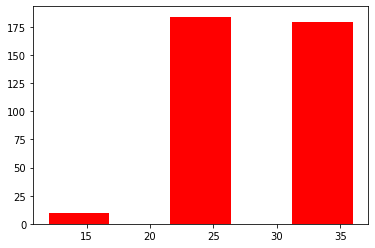

In [206]:
plt.hist(df['Срок выплаты, мес.'], bins=5,color='red')

# получается в рассрочку на 12 месяцев можно выплатить - 10 гитар, на 24 месяца - 184 гитары, на 36 месяцев - 179 гитар.

# больше всего гитар продается по сроку выплаты 24 месяца.

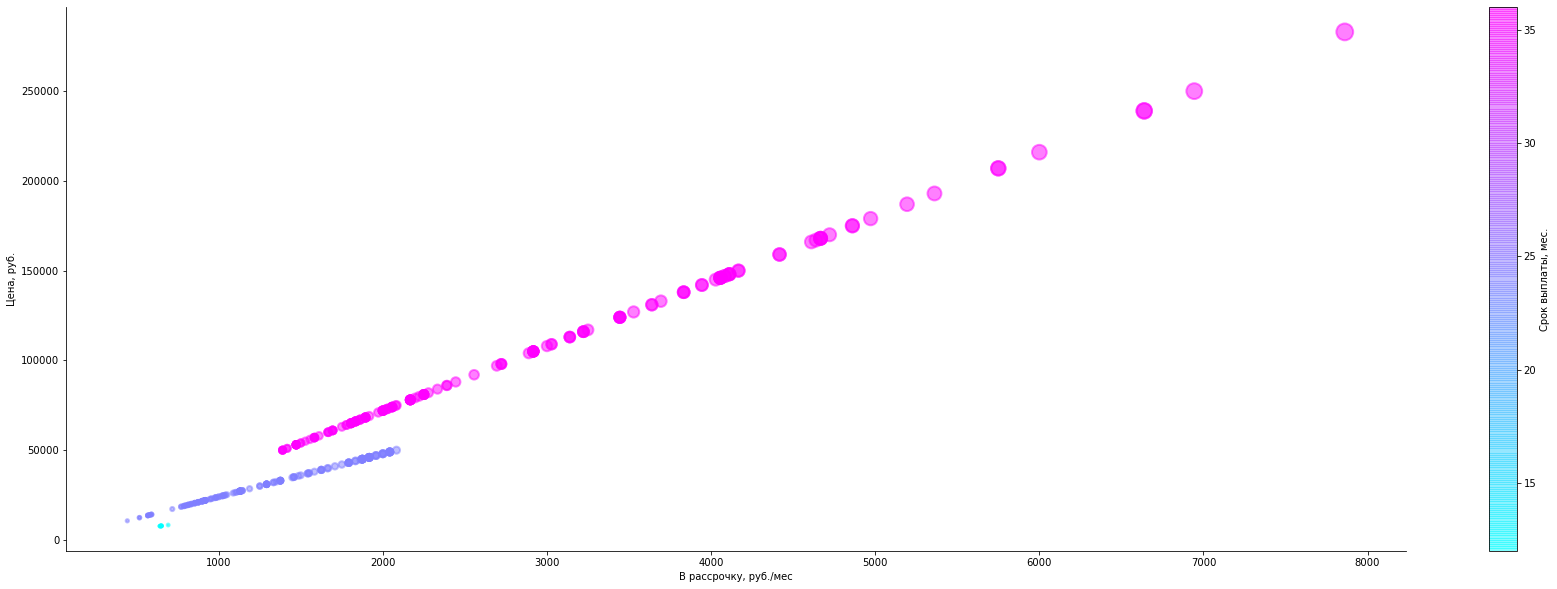

In [302]:
fig, ax = plt.subplots(figsize=(30, 10))

guitar_scatter = ax.scatter(df['В рассрочку, руб./мес'], df['Цена, руб.'],
                           s=df['Цена, руб.']/1000, alpha=0.5, c=df['Срок выплаты, мес.'],
                           cmap='cool', linewidth=2)

#удалили рамки графика справа и наверху
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.colorbar(guitar_scatter, label='Срок выплаты, мес.')
ax.set_xlabel('В рассрочку, руб./мес')
ax.set_ylabel('Цена, руб.');

In [303]:
fig.savefig('guitars.pdf')

## шаг 5

In [253]:
# сколько гитар стоят больше 20 000 рублей?

In [265]:
df[df['Цена, руб.'] >= 20000].shape[0]

335

In [254]:
# сколько гитар Fender?

In [271]:
df[df['Марка'] == 'FENDER'].shape[0]

103

In [255]:
# сколько гитар в рассрочку на 24 месяца? сколько на 36? сколько на 12?

In [277]:
df[df['Срок выплаты, мес.'] == 24.0].shape[0]

184

In [278]:
df[df['Срок выплаты, мес.'] == 36.0].shape[0]

179

In [279]:
df[df['Срок выплаты, мес.'] == 12.0].shape[0]

10

In [256]:
# сколько гитар Ibanez и они стоят больше 100 000 рублей?

In [285]:
df[(df['Марка'] == 'IBANEZ') & (df['Цена, руб.'] >= 100000)].shape[0]

3

In [257]:
# сколько гитар где платить в месяц в рассрочку нужно не больше 1000 рублей?

In [284]:
df[df['В рассрочку, руб./мес'] <= 1000].shape[0]

73

In [272]:
# средняя цена гитары

In [287]:
df['Цена, руб.'].mean()

63011.131367292226

In [273]:
# средняя оплата в рассрочку

In [288]:
df['В рассрочку, руб./мес'].mean()

1973.343163538874

In [ ]:
# максимальная цена гитары, минимальная цена гитары

In [289]:
df['Цена, руб.'].max()

283000

In [290]:
df['Цена, руб.'].min()

7700